<a href="https://colab.research.google.com/github/Roopashree1901/Titanic-Data-Analysis/blob/main/titanic%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [15]:
df =pd.read_csv('tested.csv')

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
df.shape

(418, 12)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


In [22]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,1.0
1,male,0.0


In [23]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
5,5,1.000000
6,8,0.500000
1,1,0.490909
2,2,0.428571
0,0,0.310954
4,4,0.250000
3,3,0.250000


In [24]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
4,4,1.000000
3,3,0.666667
2,2,0.606061
1,1,0.538462
7,9,0.500000
0,0,0.305556
5,5,0.000000
6,6,0.000000


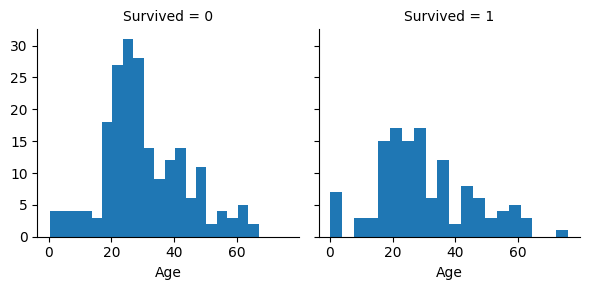

In [26]:
a = sns.FacetGrid(df, col='Survived')
a.map(plt.hist, 'Age', bins=20)

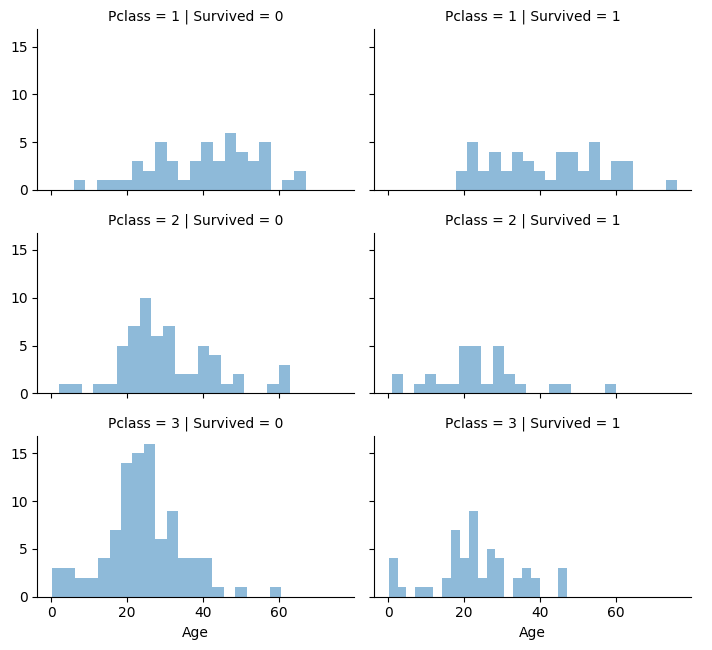

In [28]:
grid = sns.FacetGrid(
    df,
    col='Survived',
    row='Pclass',
    height=2.2,
    aspect=1.6
)

grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()
plt.show()


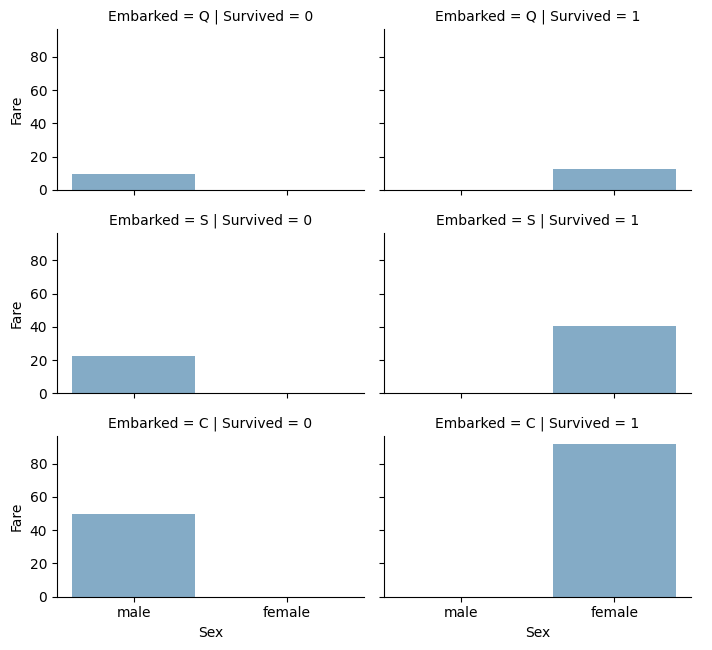

In [29]:
grid = sns.FacetGrid(
    df,
    row='Embarked',
    col='Survived',
    height=2.2,
    aspect=1.6
)

grid.map_dataframe(
    sns.barplot,
    x='Sex',
    y='Fare',
    alpha=0.6,
    errorbar=None
)

grid.add_legend()
plt.show()


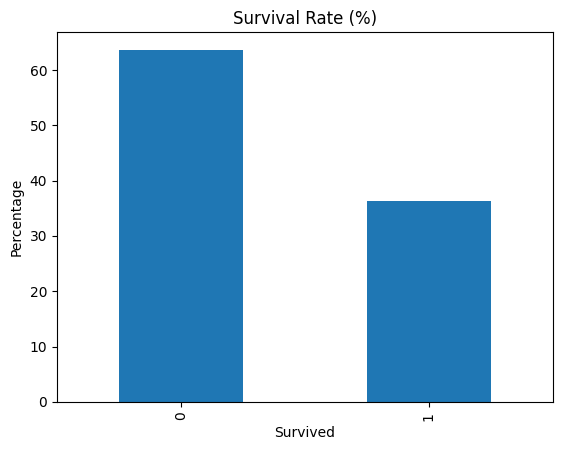

In [30]:
survival_rate = df['Survived'].value_counts(normalize=True) * 100

survival_rate.plot(kind='bar')
plt.title('Survival Rate (%)')
plt.ylabel('Percentage')
plt.show()


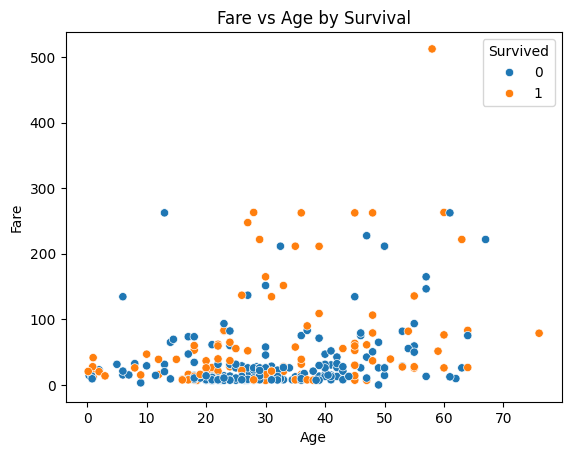

In [31]:
sns.scatterplot(
    x='Age',
    y='Fare',
    hue='Survived',
    data=df
)
plt.title('Fare vs Age by Survival')
plt.show()


In [32]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


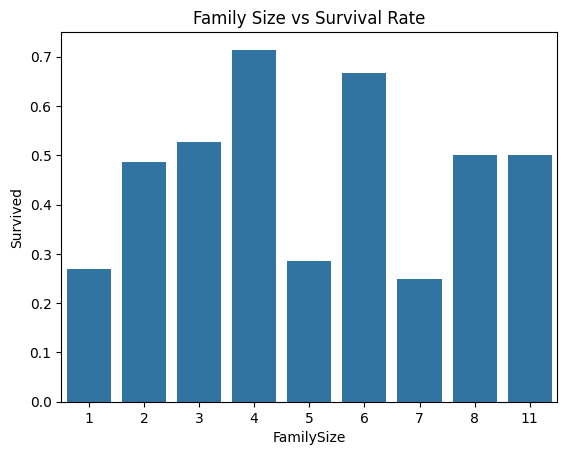

In [33]:
sns.barplot(x='FamilySize', y='Survived', data=df, errorbar=None)
plt.title('Family Size vs Survival Rate')
plt.show()


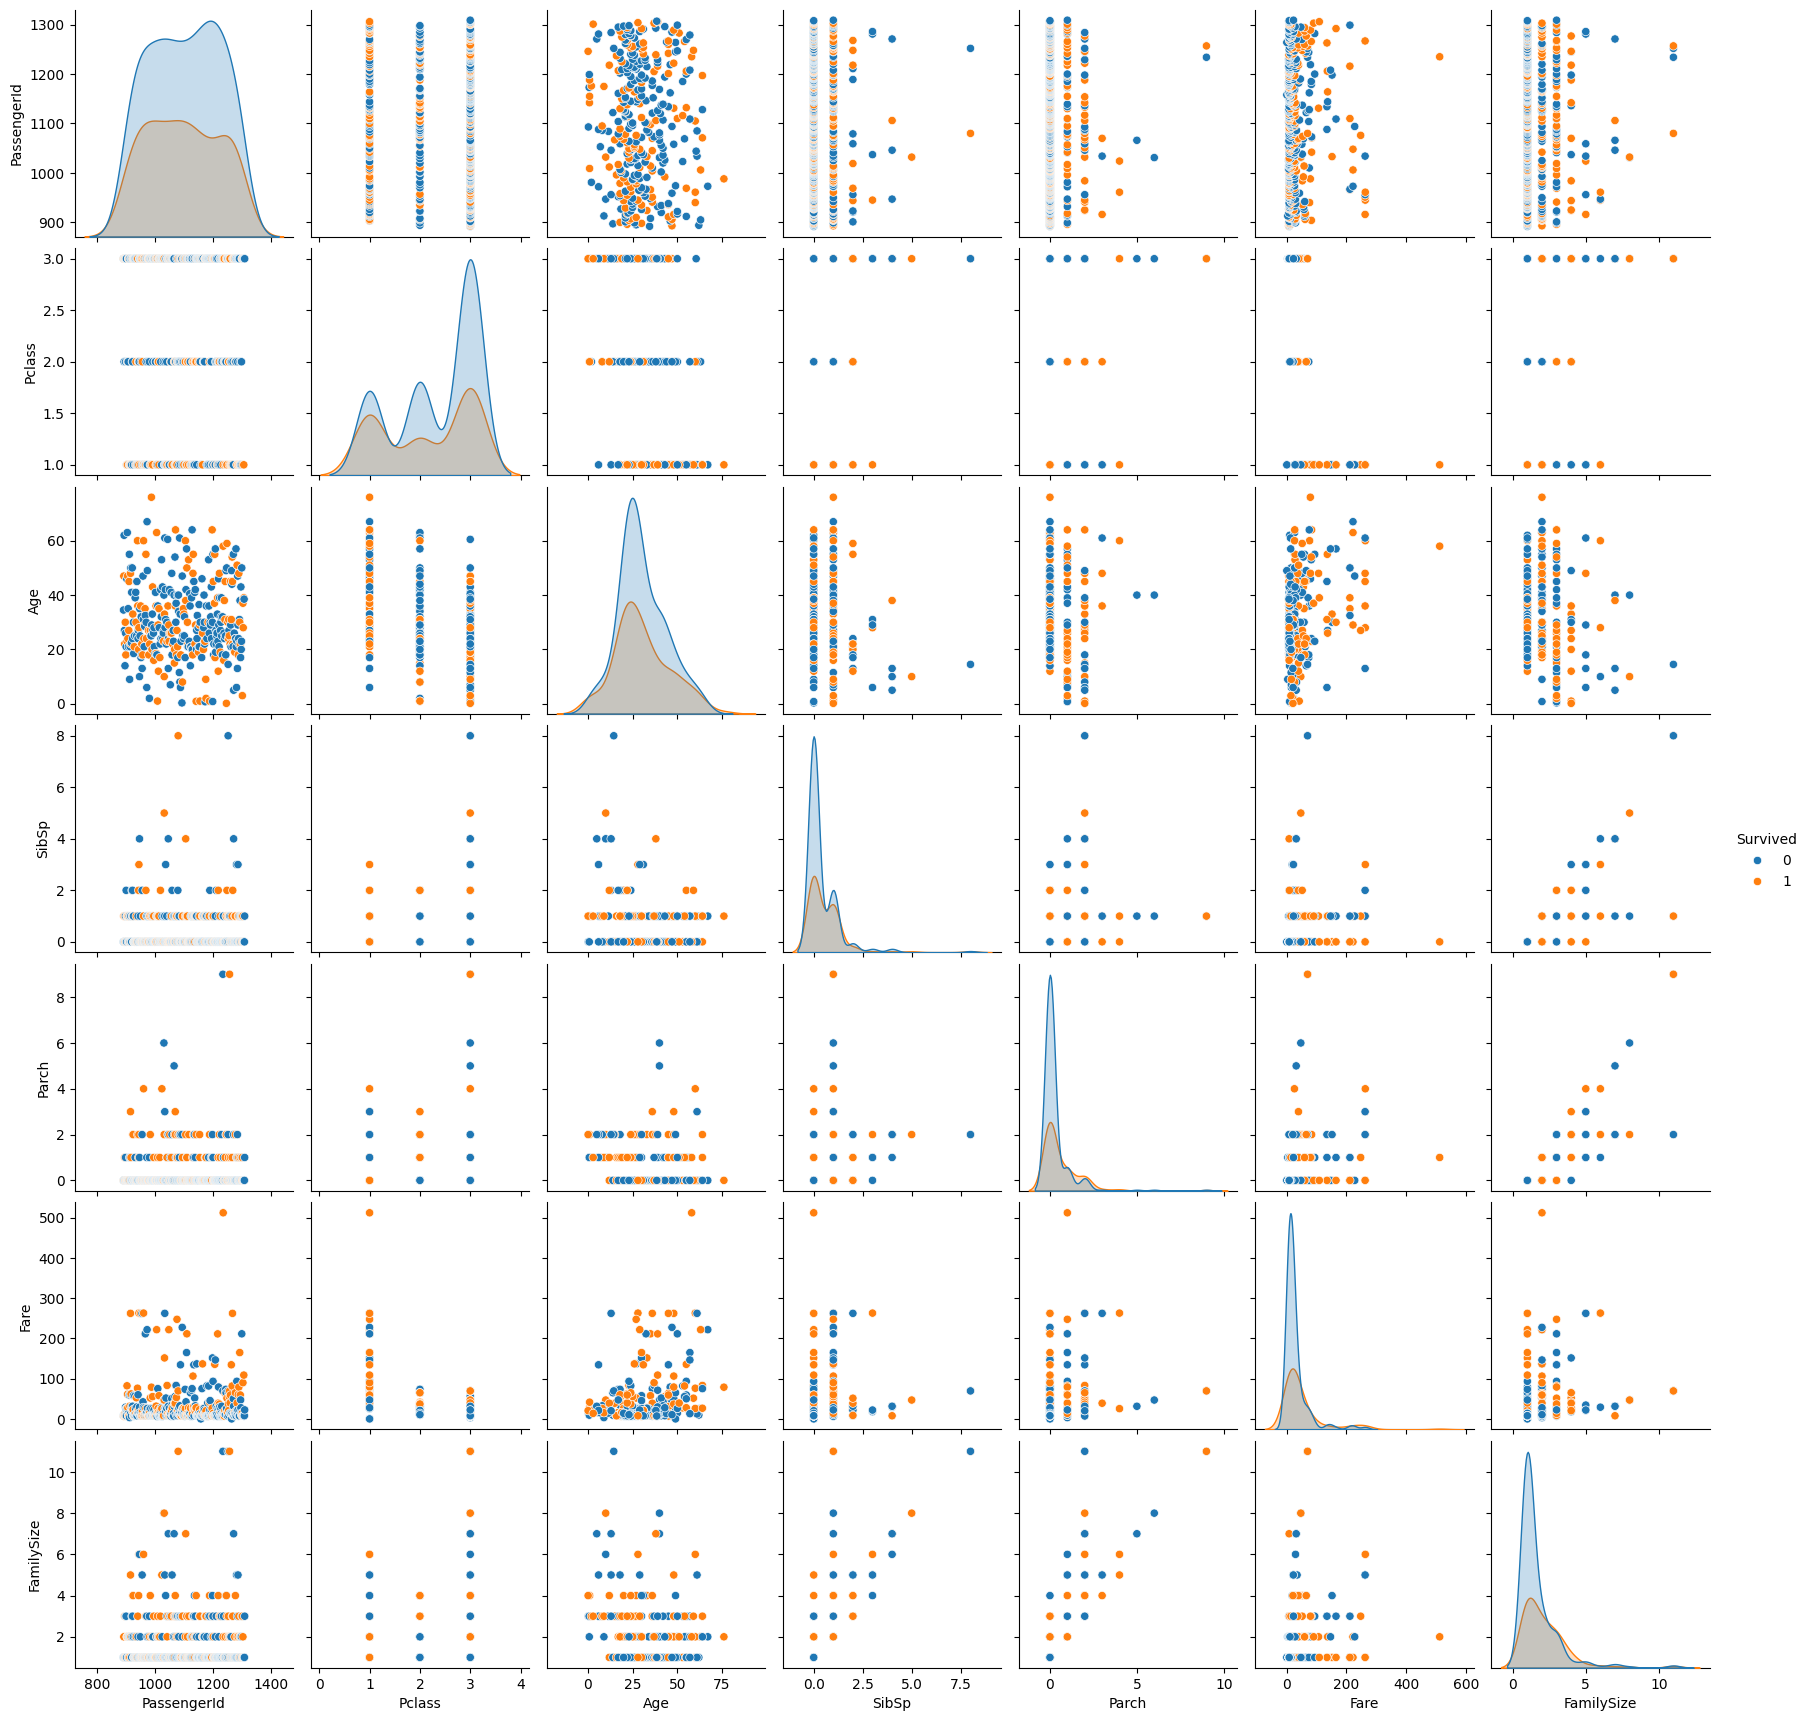

In [34]:
sns.pairplot(df, hue='Survived')
plt.show()


In [36]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0,12,18,35,60,80],
    labels=['Child','Teen','Young Adult','Adult','Senior']
)


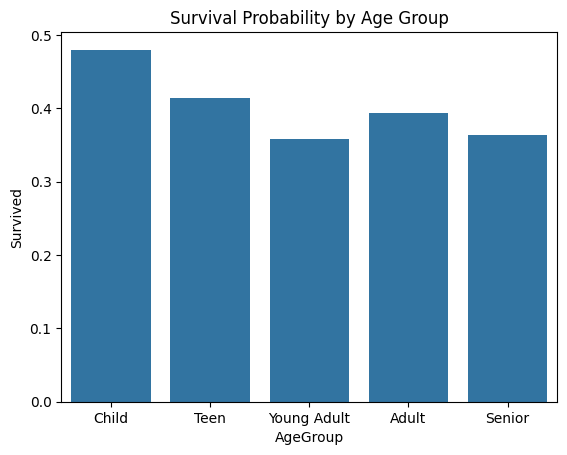

In [37]:
sns.barplot(x='AgeGroup', y='Survived', data=df, errorbar=None)
plt.title('Survival Probability by Age Group')
plt.show()


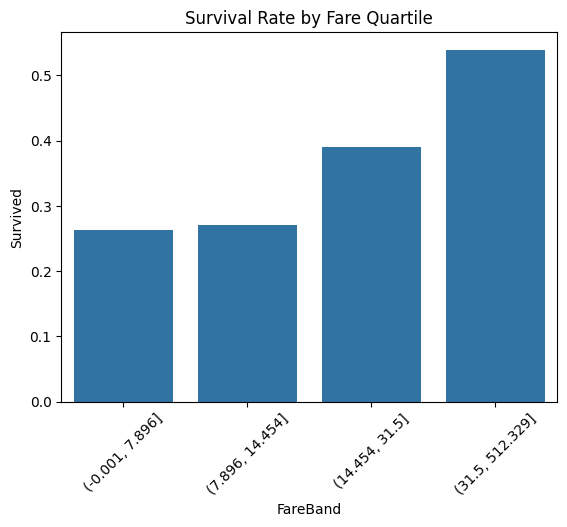

In [38]:
df['FareBand'] = pd.qcut(df['Fare'], 4)
sns.barplot(x='FareBand', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Fare Quartile')
plt.xticks(rotation=45)
plt.show()


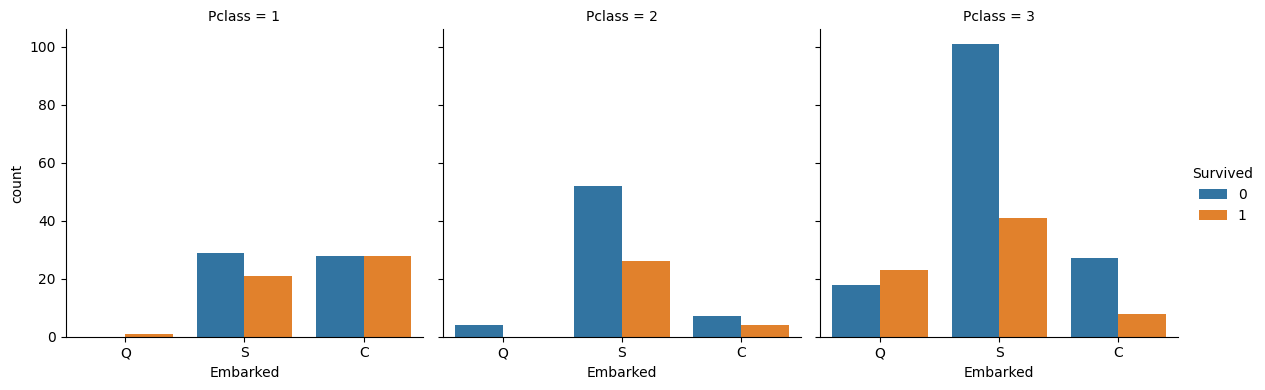

In [39]:
sns.catplot(
    x='Embarked',
    hue='Survived',
    col='Pclass',
    data=df,
    kind='count',
    height=4
)
plt.show()


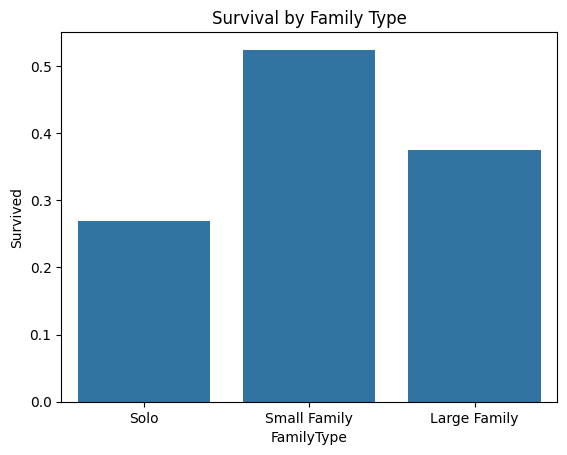

In [40]:
df['FamilyType'] = pd.cut(
    df['FamilySize'],
    bins=[0,1,4,10],
    labels=['Solo','Small Family','Large Family']
)

sns.barplot(x='FamilyType', y='Survived', data=df, errorbar=None)
plt.title('Survival by Family Type')
plt.show()


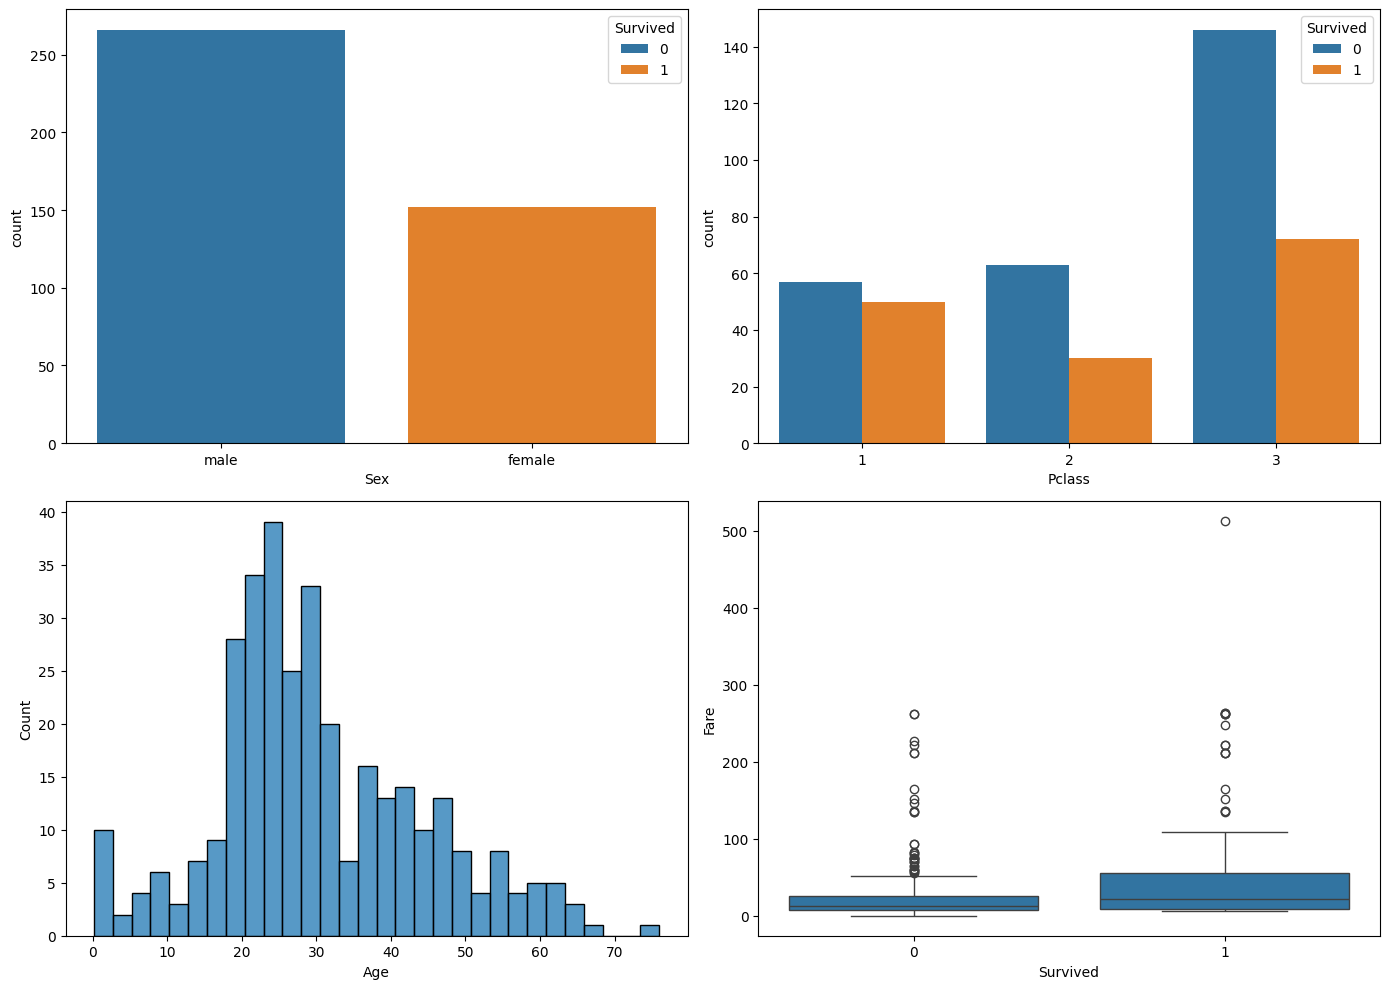

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0,0])
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[0,1])
sns.histplot(df['Age'], bins=30, ax=axes[1,0])
sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1,1])

plt.tight_layout()
plt.show()
